# Практическое задание к уроку 1

In [1]:
from typing import List, Optional
from tqdm import tqdm

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import scipy.stats as st
from scipy.stats import probplot, ks_2samp

from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted
import missingno as msno
import xgboost as xgb
%matplotlib inline

#### 1. Сделать базовый анализ данных: вывести размерность датасетов, посчитать базовые статистики, выполнить анализ пропусков, сделать выводы;

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
print("train.shape = {} rows, {} cols".format(*train.shape))
print("test.shape = {} rows, {} cols".format(*test.shape))

train.shape = 200000 rows, 202 cols
test.shape = 200000 rows, 201 cols


In [3]:
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [4]:
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [5]:
numerical_features = train.select_dtypes(include=[np.number])
print(f"count of numeric_features {numerical_features.shape[1]}")

numerical_features.columns

count of numeric_features 201


Index(['target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6',
       'var_7', 'var_8',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=201)

In [6]:
numerical_features_test = test.select_dtypes(include=[np.number])
print(f"count of numeric_features {numerical_features_test.shape[1]}")

numerical_features_test.columns

count of numeric_features 200


Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7',
       'var_8', 'var_9',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=200)

Все признаки числовые

In [7]:
discrete_feature = [
    feature for feature in numerical_features
    if len(train[feature].unique())<50 and feature not in ["Id"]
]

print(f"Discrete Variables Count: {len(discrete_feature)}")

Discrete Variables Count: 1


In [8]:
train[discrete_feature].head(1)

,target
0,0


все признаки непрерывные

In [10]:
continuous_feature = [
    feature for feature in numerical_features
    if feature not in discrete_feature + ["Id"]]

print(f"Continuous Feature Count {len(continuous_feature)}")

Continuous Feature Count 200


IndexError: index 4 is out of bounds for axis 0 with size 4

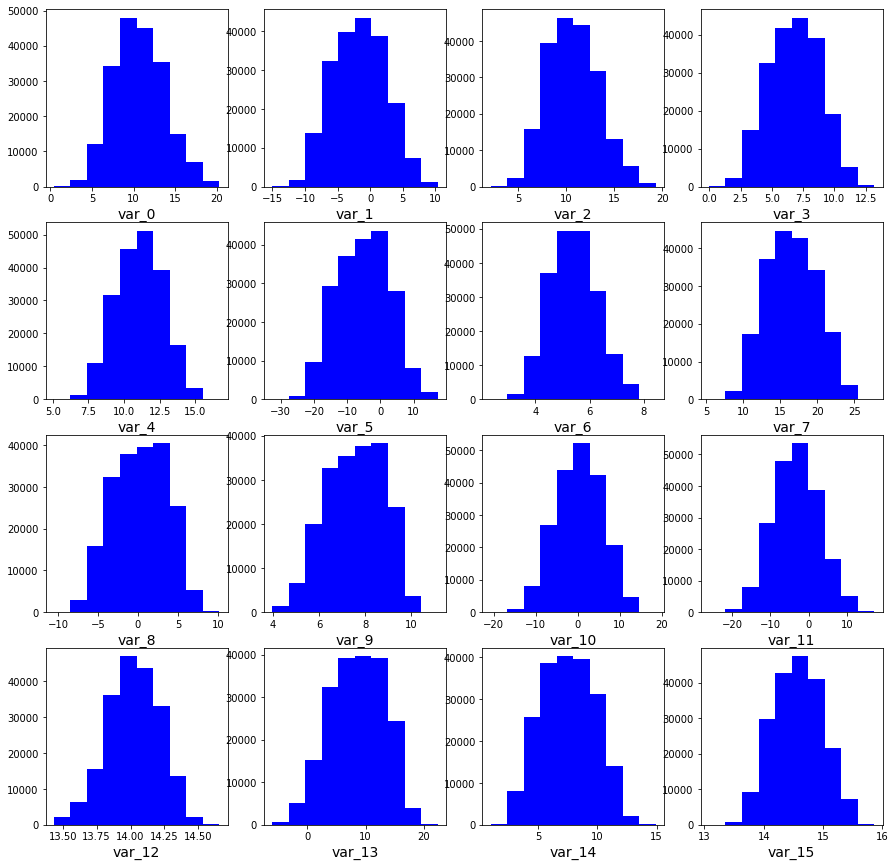

In [11]:
fig, axes = plt.subplots(4, 4, figsize=(15, 15))

for num, feature in enumerate(continuous_feature):
    data = train[feature].copy()
    axes[num//4, num%4].hist(data, bins=10, color="blue")
    axes[num//4, num%4].set_xlabel(feature, fontsize=14)

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))

for num, feature in enumerate(continuous_feature):
    try:
        train_data, test_data = train[feature].copy(), test[feature].copy()
        sns.kdeplot(train_data, ax=axes[num//4, num%4], color="blue", label="train")
        sns.kdeplot(test_data, ax=axes[num//4, num%4], color="green", label="test")
    except RuntimeError:
        pass
    except KeyError:
        train_data = train[feature].copy()
        sns.kdeplot(train_data, ax=axes[num//4, num%4], color="blue", label="train")
    axes[num//4, num%4].set_title(feature, fontsize=14)

In [ ]:
features_with_na = [
    feature for feature in train.columns
    if train[feature].isnull().sum() > 1]
features_with_na

In [ ]:
features_with_na = [
    feature for feature in test.columns
    if test[feature].isnull().sum() > 1]
features_with_na

In [ ]:
пропусков в тестовых и трен нет 

In [ ]:
features_with_na = [
    feature for feature in train.columns
    if (train[feature]==0).sum() > 1]
features_with_na

e:\anaconda3\lib\site-packages\seaborn\matrix.py:287: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
e:\anaconda3\lib\site-packages\seaborn\matrix.py:287: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


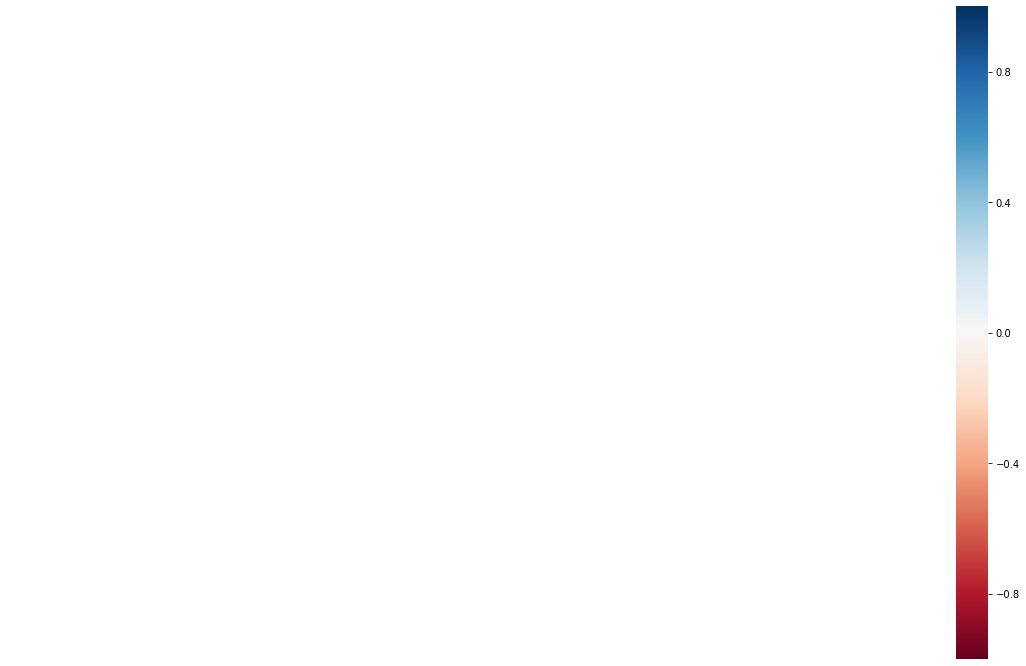

In [12]:
column=['var_0','var_1', 'var_2', 'var_5', 'var_9', 'var_10', 'var_13', 'var_20', 'var_26', 'var_40', 'var_55', 'var_80',
        'var_106', 'var_109', 'var_139', 'var_175', 'var_184', 'var_196']
msno.heatmap(train[column])

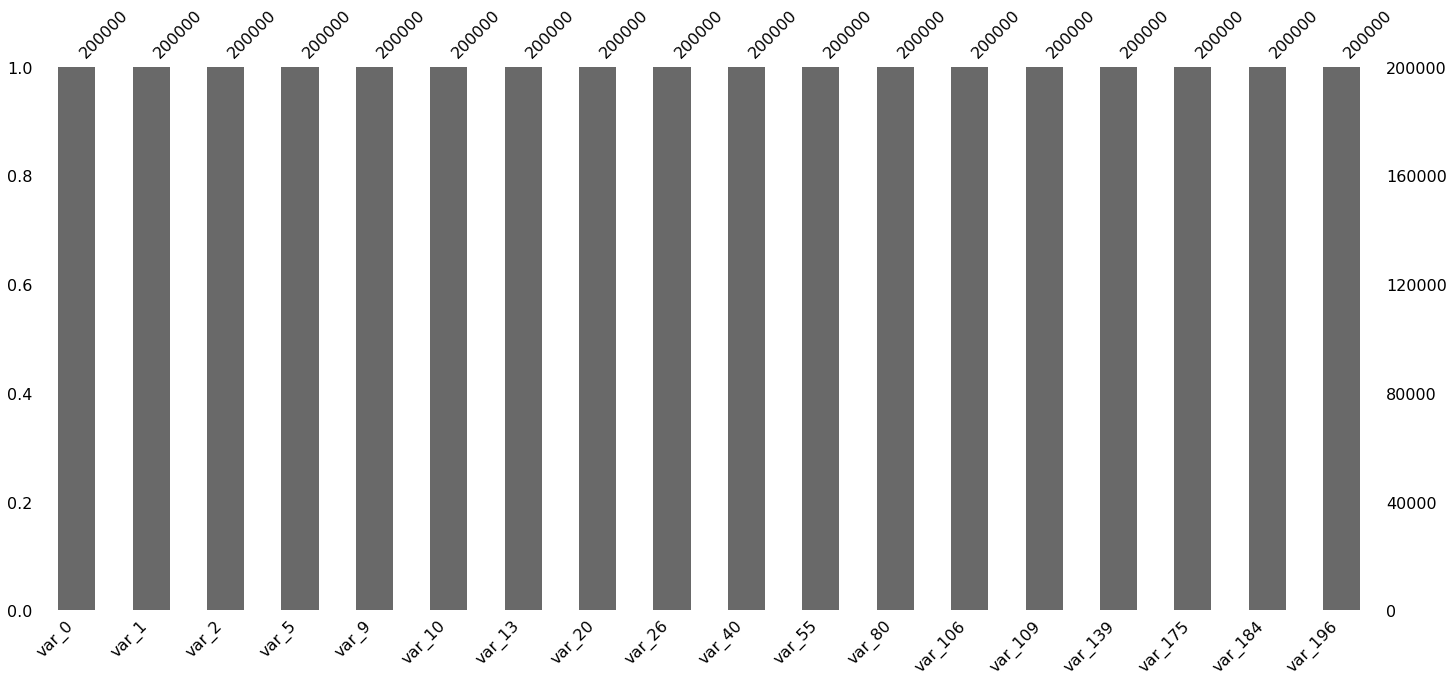

In [13]:
msno.bar(train[column], labels=True)

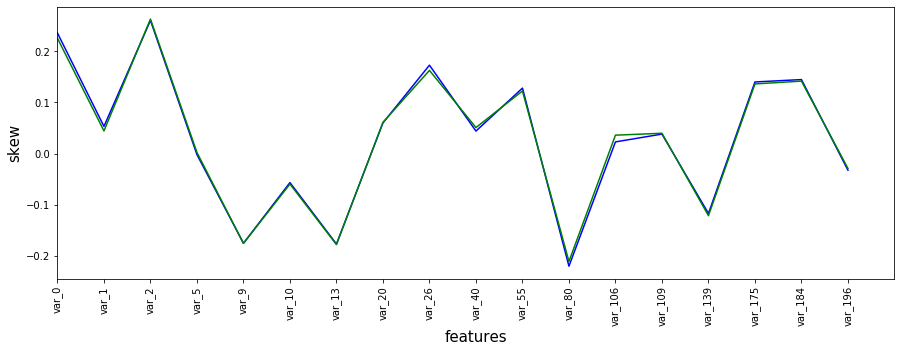

In [14]:
fig = plt.figure(figsize=(15, 5))
train_stats, test_stats = train[column].skew(), test[column].skew()
plt.plot(train_stats, color="blue", label="train")
plt.plot(test_stats, color="green", label="test")
plt.xticks(range(train_stats.shape[0]), train_stats.index, rotation=90)
plt.xlabel("features", size=15)
plt.xlim(0, len(train_stats))
plt.ylabel("skew", size=15)
plt.show()

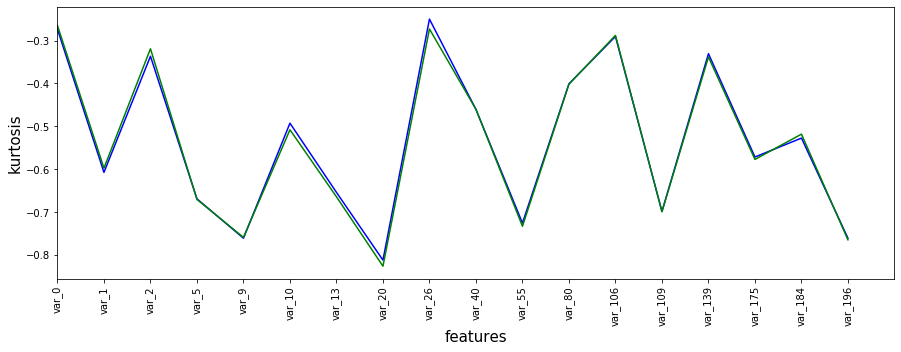

In [15]:
fig = plt.figure(figsize=(15, 5))
train_stats, test_stats = train[column].kurtosis(), test[column].kurtosis()
plt.plot(train_stats, color="blue", label="train")
plt.plot(test_stats, color="green", label="test")
plt.xticks(range(train_stats.shape[0]), train_stats.index, rotation=90)
plt.xlabel("features", size=15)
plt.ylabel("kurtosis", size=15)
plt.xlim(0, len(train_stats))
plt.show()

#### Вывод: Признаки числовые непрерывные, пропусков нет. распределения по train и test совпадают

### 2. Сделать базовый анализ целевой переменной, сделать выводы;

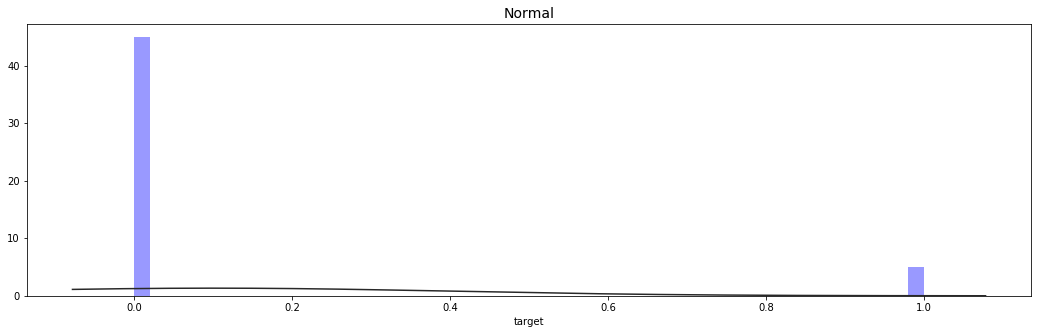

In [16]:
target = train["target"]
fig, axes = plt.subplots(1, figsize=(18, 5))

axes.set_title("Normal", fontsize=14)
sns.distplot(target, kde=False, color="blue", fit=st.norm, ax=axes)


#### Вывод: целевая переменная дискретная принимает значения 0 , 1, данные относительно целевой переменой не сбалансированы.

### 3. Построить распределение признаков в зависимости от значения целевой переменной и распределение признаков для обучающей и тестовой выборки (если машина не позволяет построить распределение для всех признаков, то выполнить задание для признаков var_0, var_1, var_2, var_5, var_9, var_10, var_13, var_20, var_26, var_40, var_55, var_80, var_106, var_109, var_139, var_175, var_184, var_196), сделать выводы;

In [86]:
column=['var_0','var_1', 'var_2', 'var_5', 'var_9', 'var_10', 'var_13', 'var_20', 'var_26', 'var_40', 'var_55', 'var_80',
        'var_106', 'var_109', 'var_139', 'var_175', 'var_184', 'var_196']

In [100]:
len(column)

18

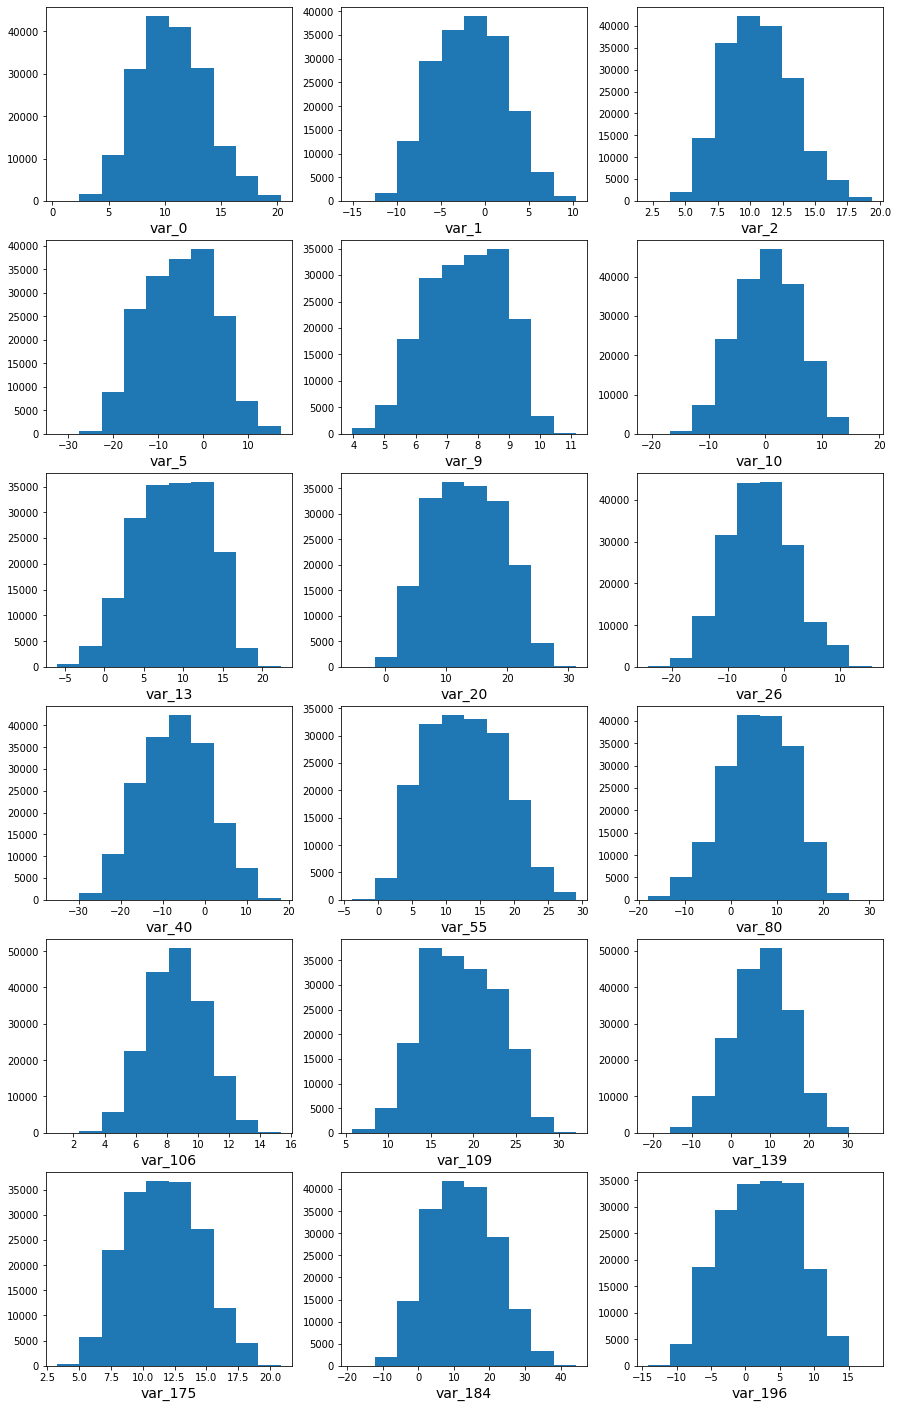

In [106]:
fig, axes = plt.subplots(6, 3, figsize=(15, 25))
for num, feature in enumerate(column):
    data = train.copy()
    axes[num//3, num%3].hist(data[data['target']==0][feature], bins=10)
    axes[num//3, num%3].set_xlabel(feature, fontsize=14)
   

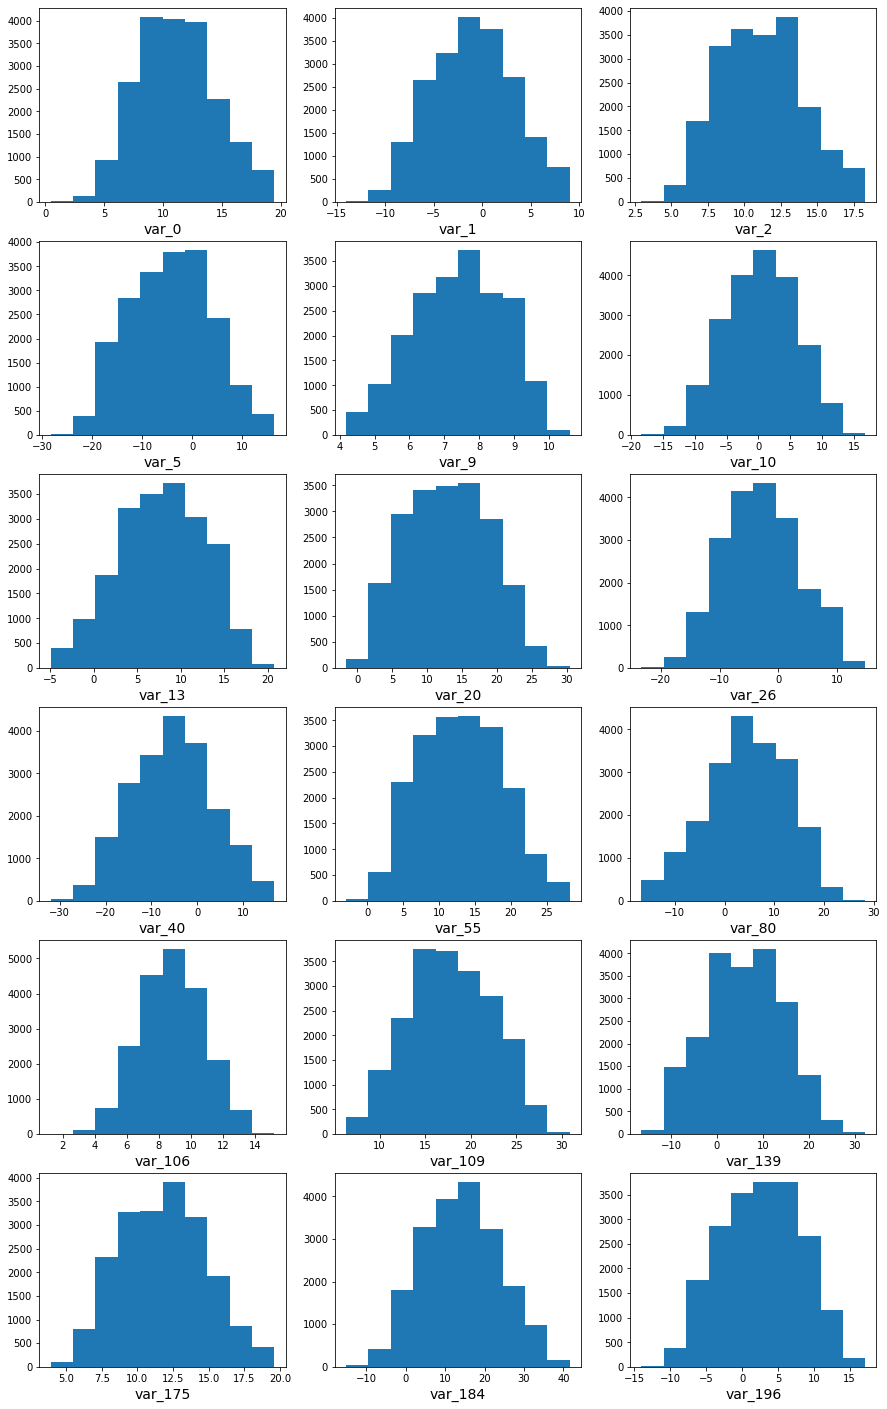

In [107]:
fig, axes = plt.subplots(6, 3, figsize=(15, 25))
for num, feature in enumerate(column):
    data = train.copy()
    axes[num//3, num%3].hist(data[data['target']==1][feature], bins=10)
    axes[num//3, num%3].set_xlabel(feature, fontsize=14)

#### Вывод: распределение в рамках целевой переменной приближается к нормальному

### 4. Построить распределение основных статистики признаков (среднее, стандартное отклонение) в разрезе целевой переменной и распределение основных статистик обучающей и тестовой выборки, сделать выводы;

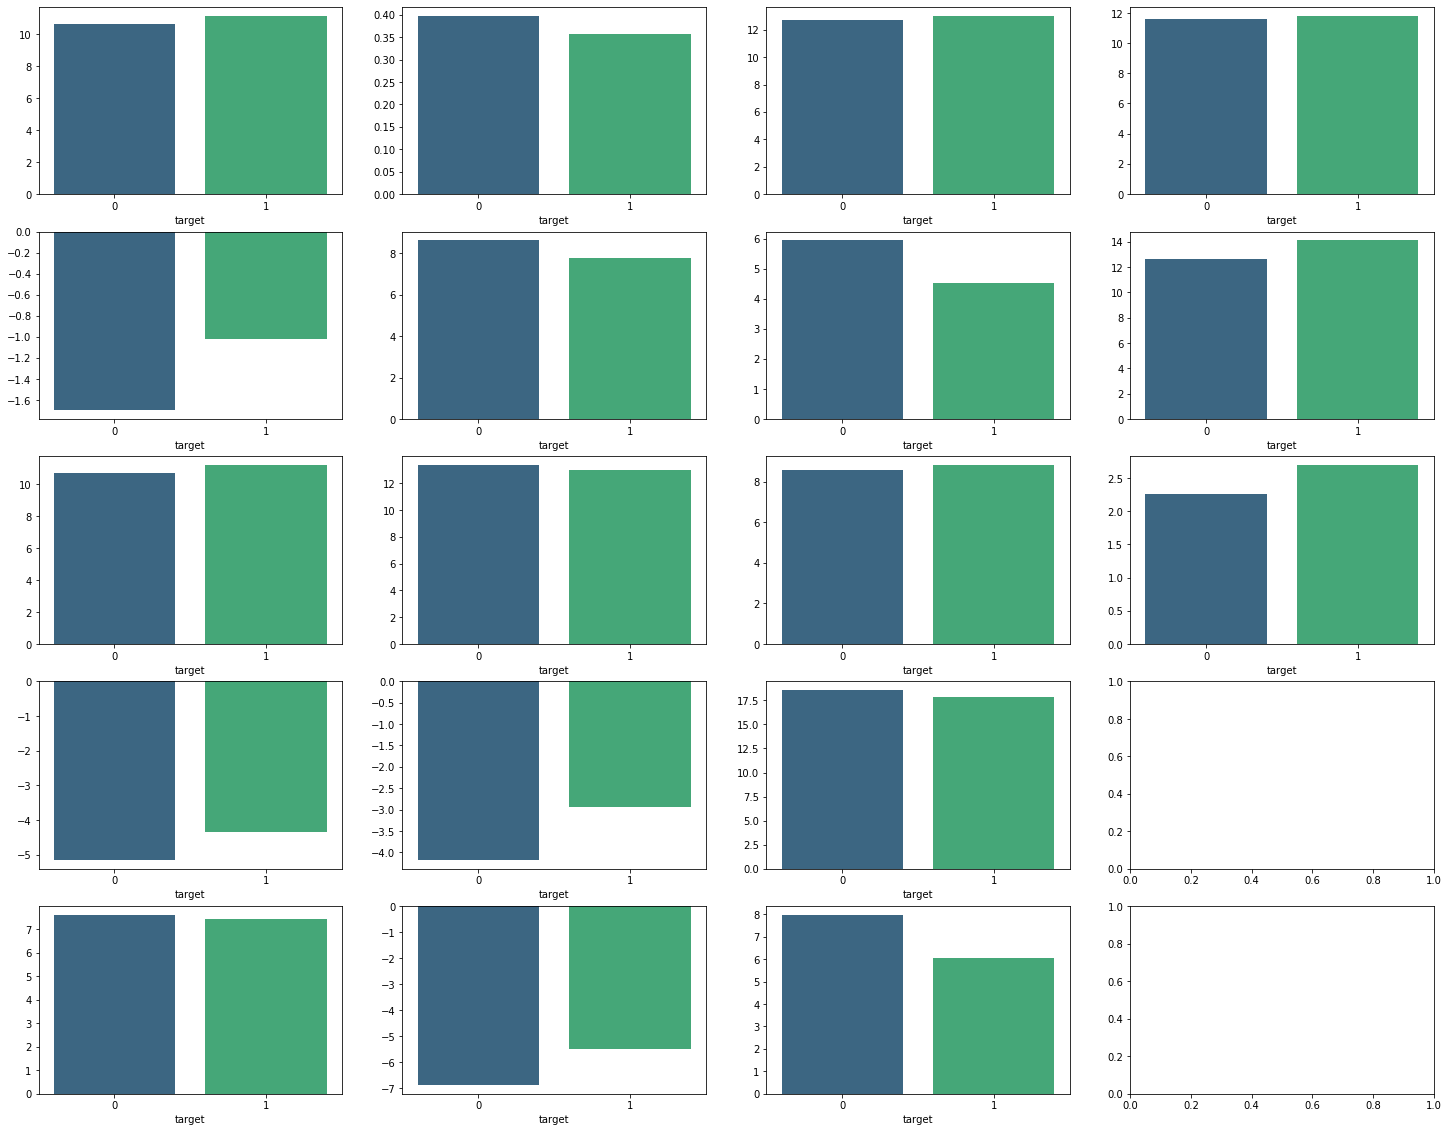

In [124]:
fig, axes = plt.subplots(5, 4, figsize=(25, 20))

for num, feature in enumerate(column):
    data = train.copy()
    statistics = data.groupby('target')[feature].mean()
    sns.barplot(x=statistics.index, y=statistics.values,
                palette="viridis",
                ax=axes[num%5, num//5])


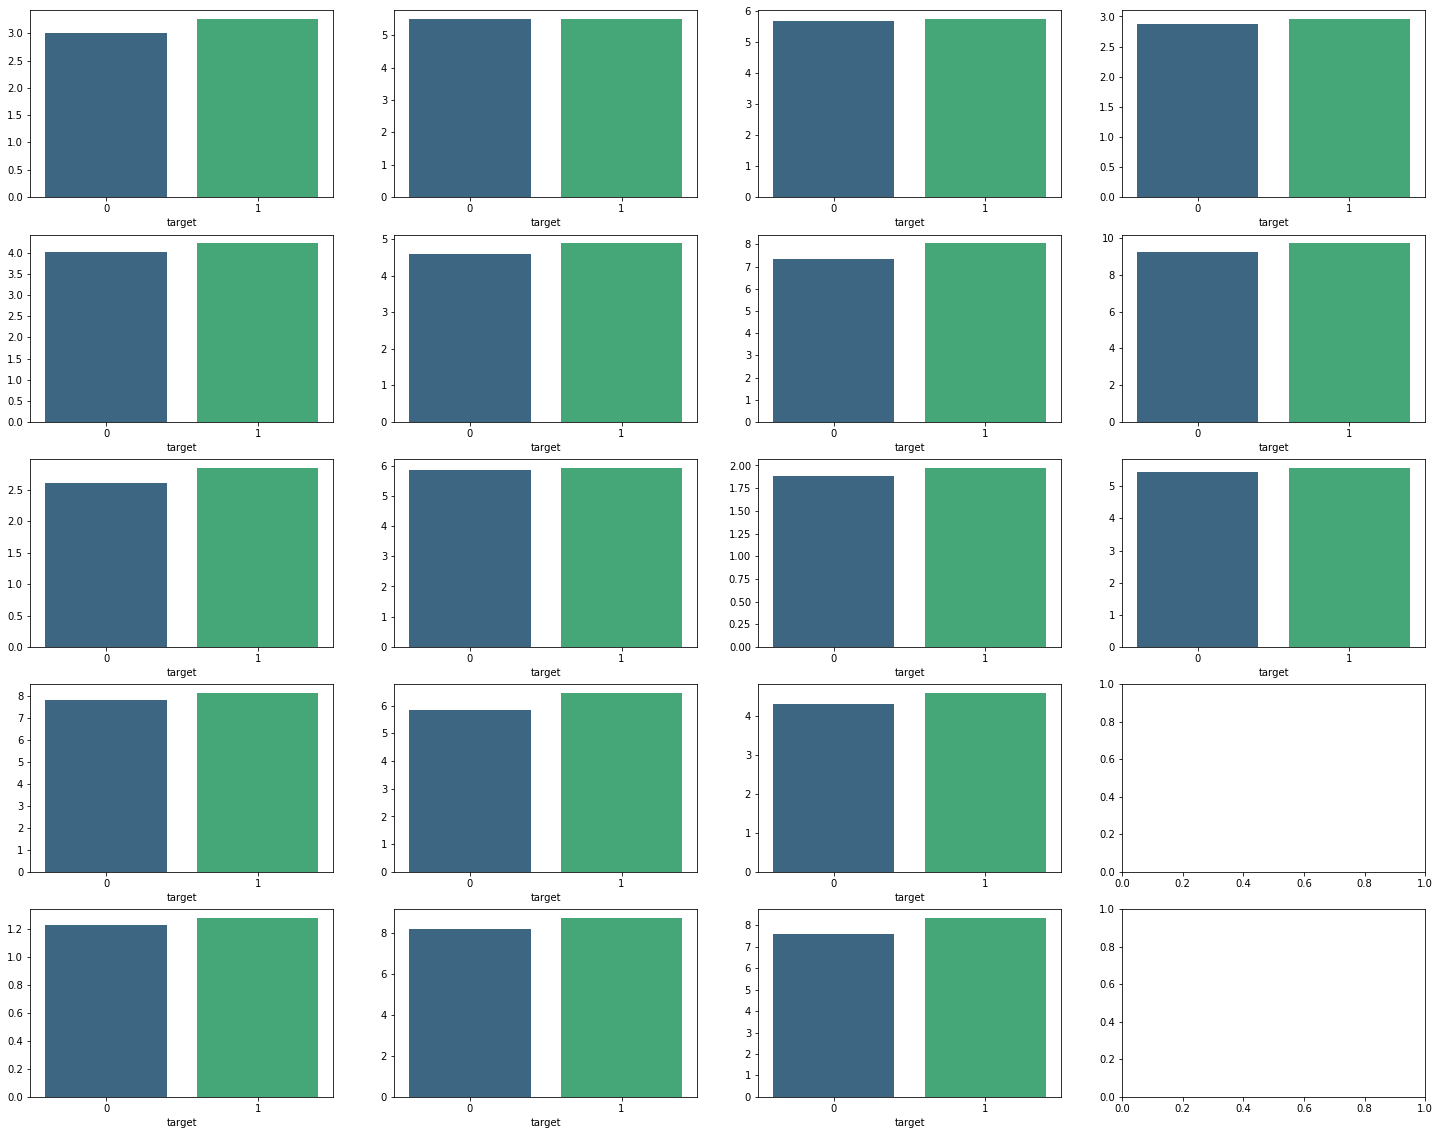

In [134]:
fig, axes = plt.subplots(5, 4, figsize=(25, 20))

for num, feature in enumerate(column):
    data = train.copy()
    statistics = data.groupby('target')[feature].std()
    sns.barplot(x=statistics.index, y=statistics.values,
                palette="viridis",
                ax=axes[num%5, num//5])

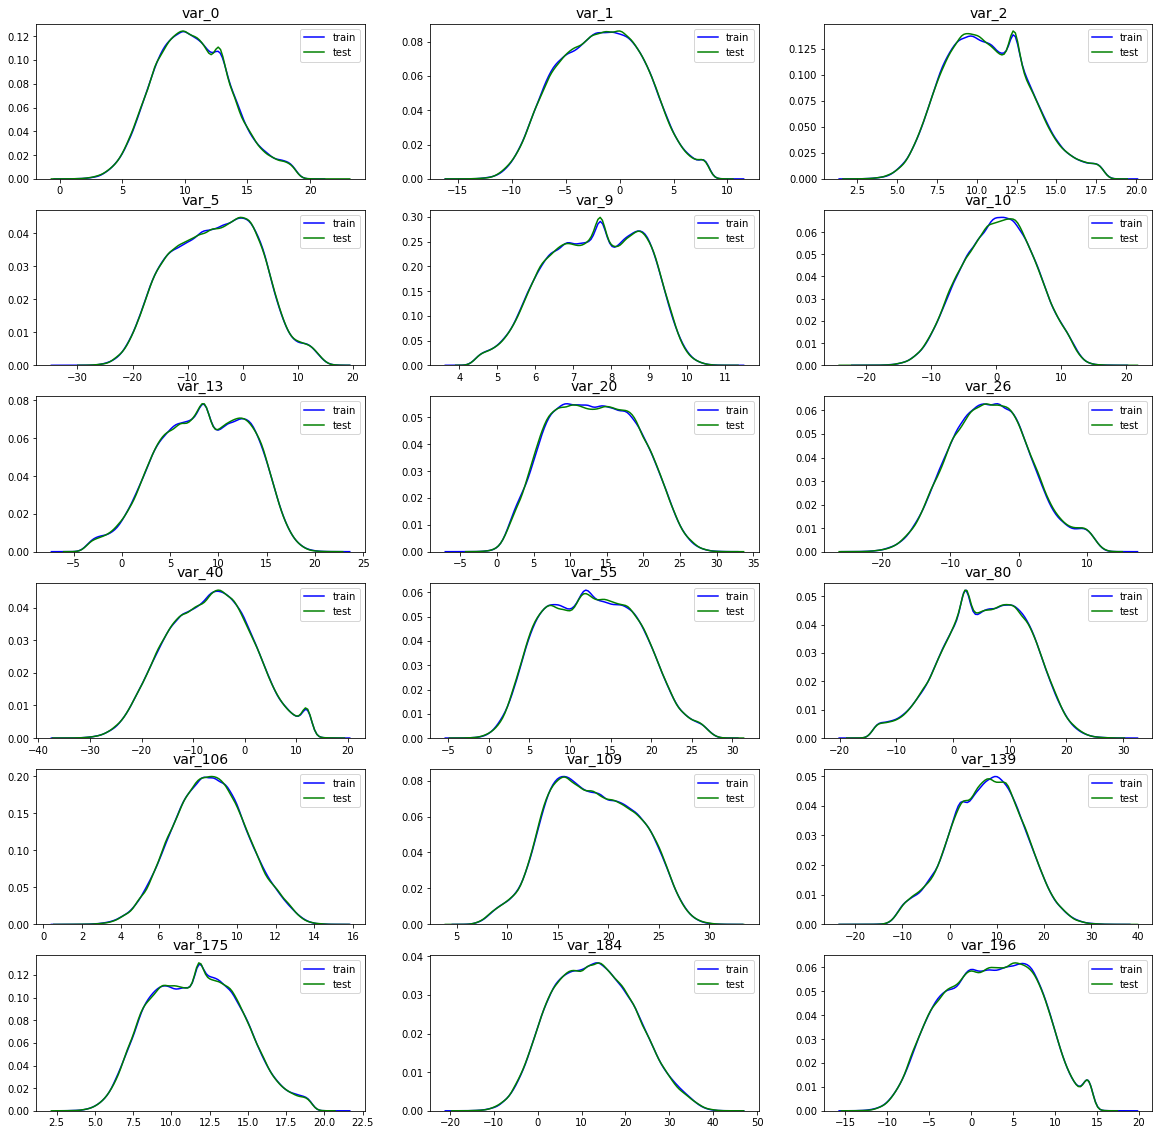

In [128]:
fig, axes = plt.subplots(6, 3, figsize=(20, 20))

for num, feature in enumerate(column):
    try:
        train_data, test_data = train[feature].copy(), test[feature].copy()
        sns.kdeplot(train_data, ax=axes[num//3, num%3], color="blue", label="train")
        sns.kdeplot(test_data, ax=axes[num//3, num%3], color="green", label="test")
    except RuntimeError:
        pass
    except KeyError:
        train_data = train[feature].copy()
        sns.kdeplot(train_data, ax=axes[num//4, num%4], color="blue", label="train")
    axes[num//3, num%3].set_title(feature, fontsize=14)

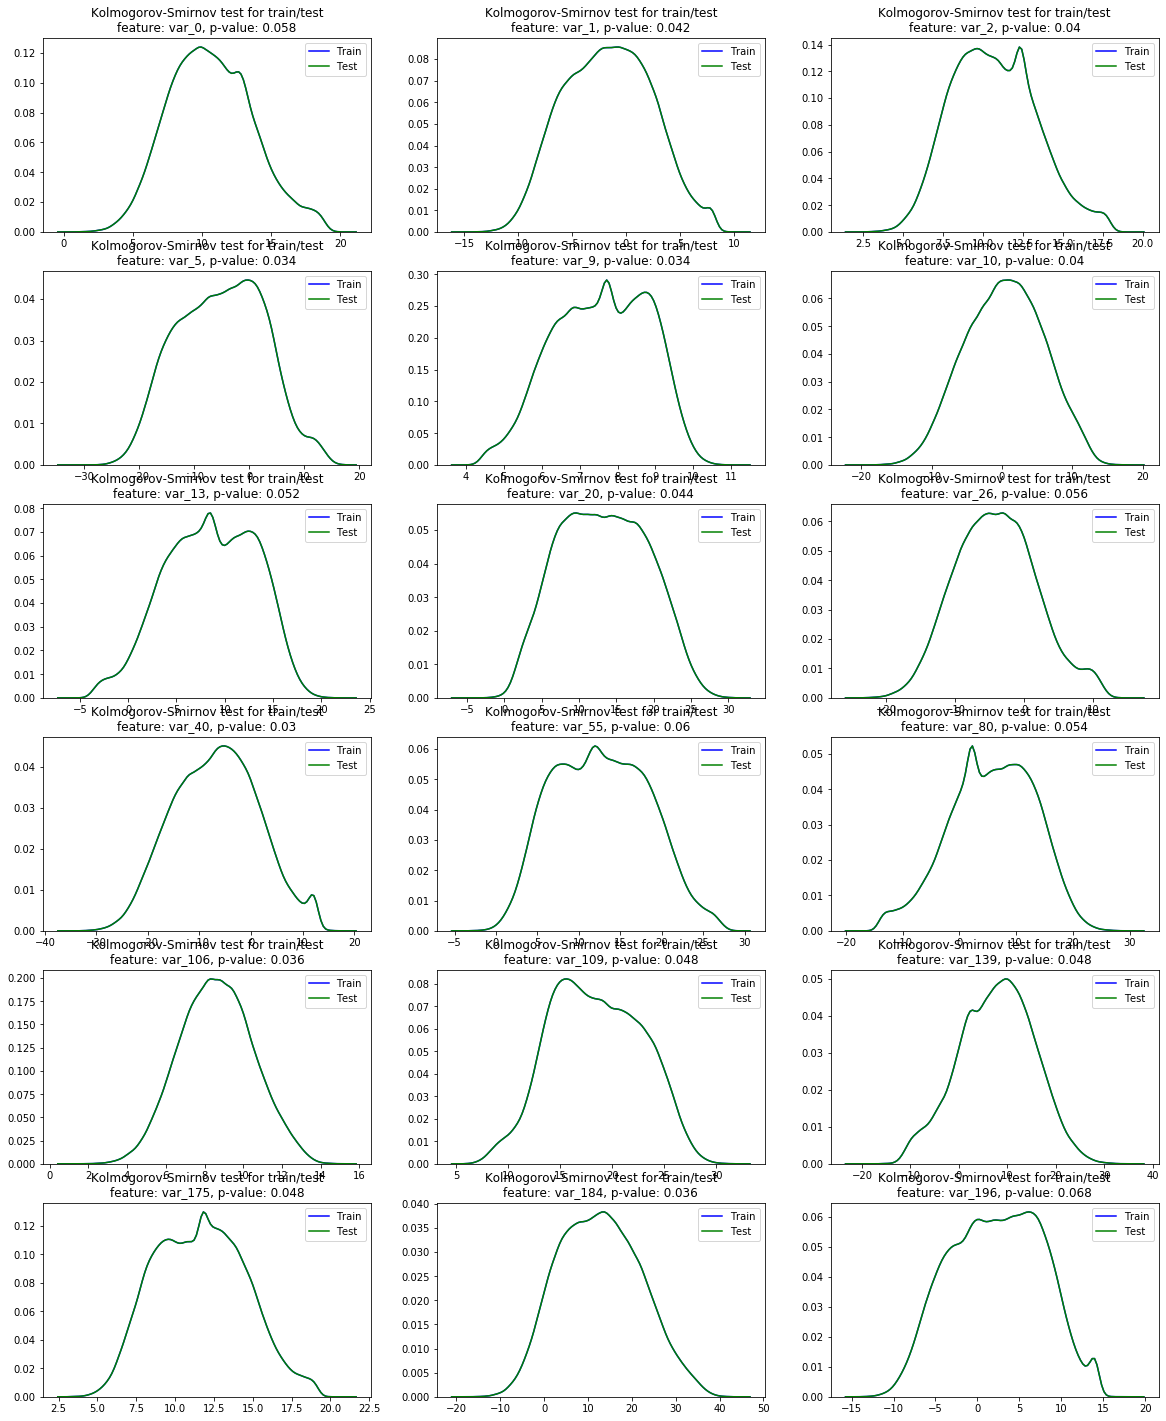

In [132]:
statistics_array = []
fig, axes = plt.subplots(6, 3, figsize=(20, 25))

for num, feature in enumerate(column):
    statistic, pvalue = ks_2samp(
        train[feature].sample(500), test[feature].sample(500)
    )
    statistics_array.append(statistic)

    sns.kdeplot(train[feature], ax=axes[num//3, num%3], color="Blue", label="Train")
    sns.kdeplot(train[feature], ax=axes[num//3, num%3], color="Green", label="Test")

    axes[num//3, num%3].set_title(
        (f"Kolmogorov-Smirnov test for train/test\n"
        f"feature: {feature}, p-value: {round(statistic, 3)}")
    )

Вывод: распределения train и test совпадают, дисперсия также совпадает в разрезе целевой переменной

### 5. Построить распределение коэффициентов корреляции между признаками. Есть ли зависимость между признаками (будем считать, что связь между признаками отсутствует, если коэффициент корреляции < 0.2)?

In [81]:
column_correlation=column
column_correlation.append('target')
correlation = train[column_correlation].corr()
corr_with_target = correlation["target"].sort_values(ascending = False)
corr_with_target

target     1.000000
var_26     0.062422
var_2      0.055870
var_0      0.052390
var_1      0.050343
var_40     0.049530
var_184    0.048315
var_106    0.032947
var_5      0.030979
var_196    0.023608
var_175    0.021692
var_55     0.017176
var_10    -0.002213
var_20    -0.018329
var_9     -0.042805
var_109   -0.049926
var_13    -0.055156
var_80    -0.057609
var_139   -0.074080
Name: target, dtype: float64

In [ ]:
corr_with_target = correlation["target"].sort_values(ascending = False)
corr_with_target

Text(0, 0.5, 'Density')

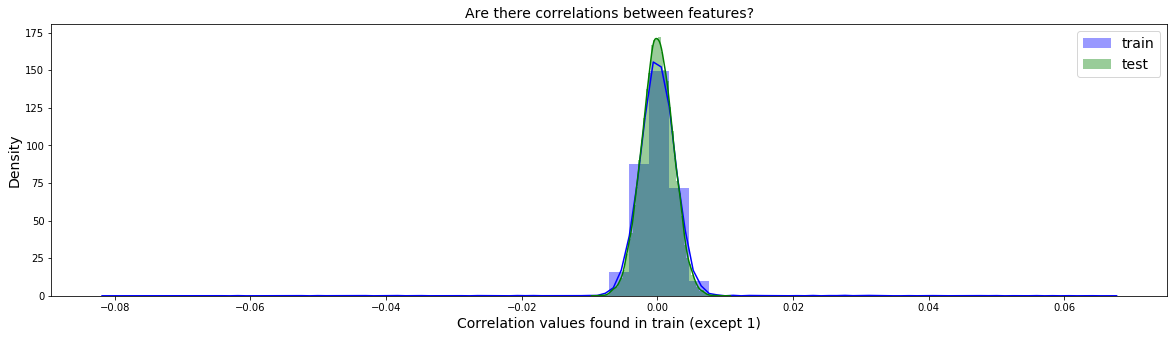

In [58]:
train_correlations = numerical_features.corr()
train_correlations = train_correlations.values.flatten()
train_correlations = train_correlations[train_correlations != 1]

columns = numerical_features.columns.tolist()
columns.remove("target")

test_correlations = test[columns].corr()
test_correlations = test_correlations.values.flatten()
test_correlations = test_correlations[test_correlations != 1]

plt.figure(figsize=(20,5))
sns.distplot(train_correlations, color="Blue", label="train")
sns.distplot(test_correlations, color="Green", label="test")

plt.xlabel("Correlation values found in train (except 1)", size=14)
plt.title("Are there correlations between features?", size=14)
plt.legend(loc="best", fontsize=14)
plt.ylabel("Density", size=14)

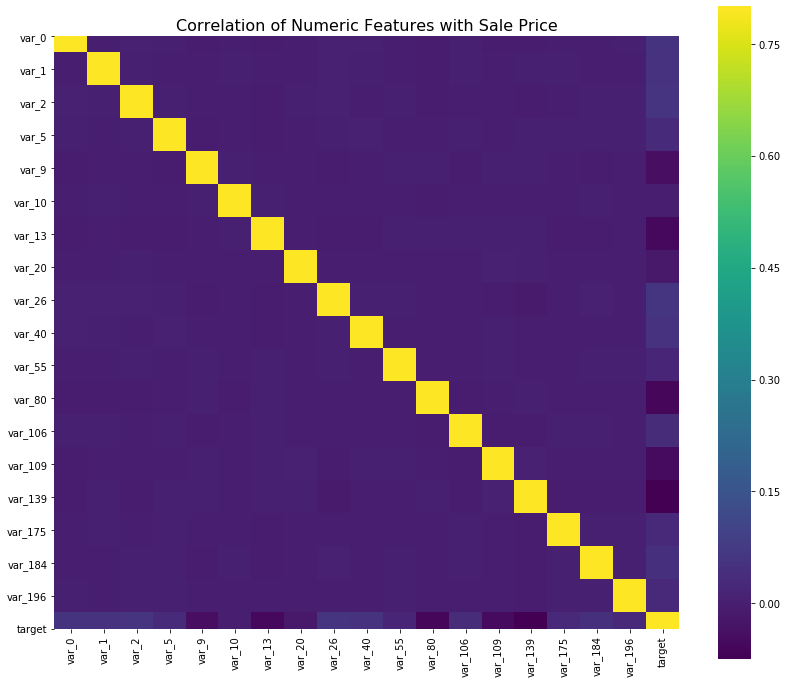

In [82]:
fig, axes = plt.subplots(figsize = (14,12))
plt.title("Correlation of Numeric Features with Sale Price", y=1, size=16)
sns.heatmap(correlation, square=True, vmax=0.8, cmap="viridis")

#### Вывод: линейных зависимостей между признаками не наблюдается 

### 6. Выявить 10 признаков, которые обладают наибольшей нелинейной связью с целевой переменной.

In [66]:
%%time
parameters = {"max_depth": 6, "n_estimators": 25, "random_state": 27, "n_jobs": 2}

forest = RandomForestRegressor(**parameters)
forest.fit(numerical_features.drop("target", axis=1), target)

Wall time: 4min 31s


RandomForestRegressor(max_depth=6, n_estimators=25, n_jobs=2, random_state=27)

Text(0.5, 1.0, 'What are the top important features to start with?')

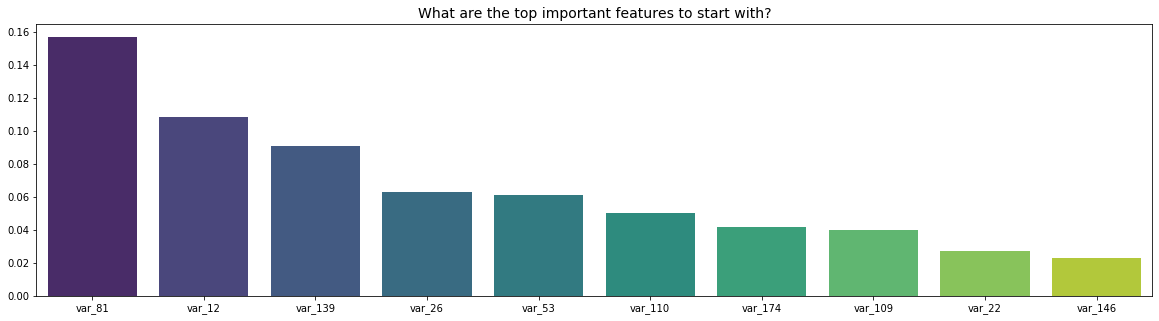

In [67]:
n_top = 10
importances = forest.feature_importances_
idx = np.argsort(importances)[::-1][0:n_top]
feature_names = numerical_features.drop("target", axis=1).columns

plt.figure(figsize=(20, 5))
sns.barplot(x=feature_names[idx], y=importances[idx], palette="viridis")
plt.title("What are the top important features to start with?", size=14)

### 7. Провести анализ идентичности распределения признаков на обучающей и тестовой выборках, сделать выводы.

In [68]:
feature_names[idx]

Index(['var_81', 'var_12', 'var_139', 'var_26', 'var_53', 'var_110', 'var_174',
       'var_109', 'var_22', 'var_146'],
      dtype='object')

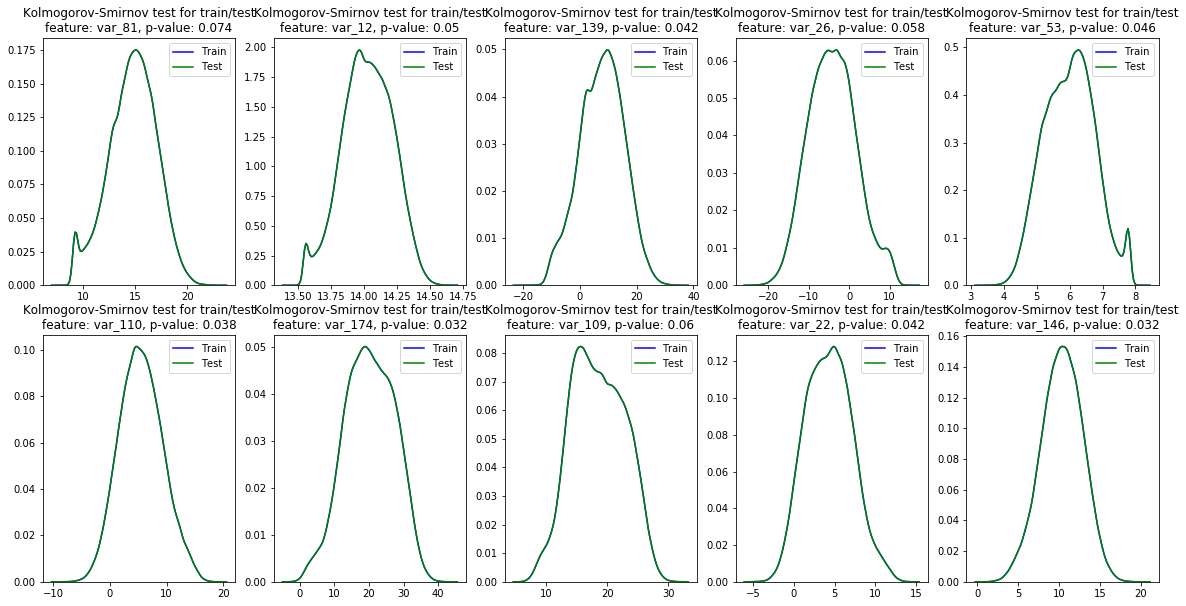

In [69]:
statistics_array = []
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for num, feature in enumerate(feature_names[idx]):
    statistic, pvalue = ks_2samp(
        train[feature].sample(500), test[feature].sample(500)
    )
    statistics_array.append(statistic)

    sns.kdeplot(train[feature], ax=axes[num//5, num%5], color="Blue", label="Train")
    sns.kdeplot(train[feature], ax=axes[num//5, num%5], color="Green", label="Test")

    axes[num//5, num%5].set_title(
        (f"Kolmogorov-Smirnov test for train/test\n"
        f"feature: {feature}, p-value: {round(statistic, 3)}")
    )

#### Вывод: распределения признаков идентичны